In [1]:
#マウント
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
##作業するディレクトリを指定する.
%cd '/content/drive/MyDrive/Colab_Notebooks/arXiv_data'

/content/drive/MyDrive/Colab_Notebooks/arXiv_data


In [3]:
#関係するツールの導入
import os
import numpy as np
import pandas as pd
import collections
import re
from string import digits

import sys
import time

In [4]:
#input_folder_path: 入力となるファイルの保存場所
input_folder_path ='/content/drive/MyDrive/Colab_Notebooks/arXiv_data/Step_6'
#output_folder_path: 出力となるpdfファイルの保存場所
output_folder_path = '/content/drive/MyDrive/Colab_Notebooks/arXiv_data/Step_7'

In [5]:
#モジュール
module_path = '/content/drive/My Drive/Colab_Notebooks/arXiv_data/module/'
os.chdir(module_path)
import file_processing

In [6]:
file_names_list = file_processing.read_file_to_list(input_folder_path + "/" + 'k_means_id_list_10_20_sub.txt')

In [7]:
file_names_list

['0704.2723',
 '0704.3127',
 '0704.3443',
 '0704.3752',
 '0705.0118',
 '0705.1316',
 '0705.2332',
 '0705.2522',
 '0705.3087',
 '0705.3860',
 '0704.1446',
 '0704.1543',
 '0704.1673',
 '0704.1807',
 '0704.1851',
 '0704.1986',
 '0704.2081',
 '0704.2119',
 '0704.2152',
 '0704.2646',
 '0704.1208',
 '0704.1349',
 '0704.1352',
 '0704.1372',
 '0704.1861',
 '0704.1862',
 '0704.1954',
 '0704.2031',
 '0704.2104',
 '0704.2359']

In [8]:
len(file_names_list)

30

In [9]:
df = pd.read_csv(input_folder_path + "/df_10_z_value_from_field_sub.csv")
df = df.drop('Unnamed: 0', axis=1)

##クラスタリングの前準備

In [10]:
#正規化
def minmax_norm(list_input):
    return (list_input - list_input.min()) / ( list_input.max() - list_input.min())

K-平均法

In [11]:
#k平均法に必要なパッケージ
from matplotlib import pyplot as plt
from sklearn import datasets, preprocessing
from sklearn.cluster import KMeans
import numpy as np

In [12]:
#クラスタリングの結果からfile名をクラスタごとに分ける
# show_result (str_list,int_array,int) -> str_list_list
def show_result (file, result_k,n):
  result_file = []
  for i in range(n):
    result_file.append([])
  for j in range(len(file)):
    l = result_k[j]
    result_file[l].append(file[j])
  #return print(result_file)
  return result_file

In [13]:
#傾向となる単語を取りだす
#df: データ k_means_result:k-means法でクラスタリングした結果, n:クラスタリングの個数
def trend (df,k_means_result,n,m,dictionary):
  trend = []
  df['cluster_id']=k_means_result
  for i in range(n):
    trend_n = df[df['cluster_id']==i].mean()
    trend_number = trend_n.drop('cluster_id', axis=0)
    trend_word = trend_number.sort_values(ascending = False)[0:m].index
    trend.append((i,trend_word))
  #return print(trend)
  return trend

階層的クラスタリング

In [14]:
#階層的クラスタリングに必要なパッケージ
import numpy as np
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram
from sklearn.datasets import load_iris
from sklearn.cluster import AgglomerativeClustering

In [15]:
def plot_dendrogram(model, **kwargs):
   # Create linkage matrix and then plot the dendrogram

   # create the counts of samples under each node
    #要素の値が全てゼロの配列を作成する
   counts = np.zeros(model.children_.shape[0])
   n_samples = len(model.labels_)
   for i, merge in enumerate(model.children_):
      current_count = 0
      for child_idx in merge:
         if child_idx < n_samples:
            current_count += 1 # leaf node
         else:
            current_count += counts[child_idx - n_samples]
      counts[i] = current_count

   linkage_matrix = np.column_stack([model.children_, model.distances_,
counts]).astype(float)

   # Plot the corresponding dendrogram
   #dendrogram(linkage_matrix, **kwargs,labels = file_names_list,leaf_rotation=90 )#, orientation='left')
   dendrogram(linkage_matrix, **kwargs,labels = file_names_list, orientation='left')

In [16]:
df

,manifolds,prove,algebras,mathematics,denote,riemannian,ﬁnite,satisﬁes,imply,preprint,compact,spaces,proposition,sense,vector,multiplication,primitive,uniformly,regularity,solution,assume,hence,phrases,necessarily,generated,manifold,remark,ricci,problem,every,consequently,converges,proved,belongs,rings,curvature,metric,anal,gives,smooth,estimates,mech,respect,must,bound,holds,inﬁnite,author,algebra,comm,corollary,solutions,commutative,satisfying,estimate,ideal,obtain,ﬁnitely,math,inequality,positive,metrics,exists,moreover,gradient,associative,enough,cauchy,ring,existence,supported,bounded
0,-0.641970,9.271655,57.872810,5.260651,0.376980,-0.445473,1.070390,7.335347,-0.557809,-0.524027,-0.982755,-0.889574,6.976971,0.496078,-0.700924,-0.462584,-0.349321,-0.537409,-0.351035,-1.516170,10.965051,4.655587,-0.206739,-0.526756,48.485206,-0.824744,-0.892083,-0.394420,-1.425202,37.133097,-0.589093,-0.452675,2.032496,-0.482759,-0.507278,-0.803605,-1.152309,-0.395602,-1.208842,-0.936770,-0.746590,-0.294534,-1.192471,-1.246706,-1.099072,2.299572,8.586437,-0.479919,34.833502,16.244653,1.439636,-1.256811,-0.562511,-0.700306,-1.020722,41.090097,1.859003,-0.522497,4.571365,-0.758204,-1.253886,-0.421473,3.919295,1.971077,-0.552040,-0.264600,-0.871160,-0.382750,-0.861419,-0.845709,0.495854,-0.911612
1,-0.892633,3.250228,10.641297,0.129739,2.925383,-0.619412,3.487656,4.701619,4.382162,-0.728638,-1.366482,-1.236917,4.127856,0.751031,2.120925,4.021282,32.456671,-0.747246,-0.488100,-1.633458,4.349888,17.536232,-0.287462,-0.732433,0.730687,-1.146773,14.081308,-0.548425,-1.981686,1.817224,-0.819111,-0.629426,2.958241,0.818602,-0.705350,-1.117380,-1.602240,-0.550068,-1.085611,-1.302541,-1.038104,-0.409537,-1.054685,-1.156320,-1.528216,2.578101,-1.179320,2.330042,38.554376,-0.502417,8.748486,-1.747545,-0.782150,0.053384,-1.419272,24.201549,0.816984,-0.726511,-0.814331,-1.054252,-1.743478,-0.586042,13.636190,5.739650,-0.767589,29.530958,1.265977,-0.532199,-0.362671,20.939707,-0.168626,-1.267561
2,-0.692767,0.592660,46.969257,-0.727439,3.903298,-0.480721,0.757747,-0.922533,-0.601946,-0.565491,-1.060517,-0.959963,4.864405,7.448639,1.107855,1.504218,-0.376961,-0.579933,-0.378811,-1.636139,0.531285,-0.325117,-0.223097,1.190943,-1.090499,-0.890003,2.154504,-0.425629,-1.537973,1.702327,0.937533,-0.488493,1.772886,-0.520958,1.279502,-0.867191,-1.243487,-0.426904,0.996394,-1.010894,-0.805665,-0.317839,1.823098,6.091567,1.344430,2.986667,-0.915262,3.344207,54.879485,2.174804,6.546106,-1.356257,4.335679,3.214673,-1.101488,0.450594,2.737537,-0.563841,-0.086321,5.293988,2.344087,-0.454823,12.111708,-1.087252,-0.595721,-0.285537,0.123908,-0.413036,3.374527,-0.912627,-0.844362,-0.983745
3,-0.933519,6.852398,46.414801,2.080700,3.198449,-0.647783,0.903109,1.170718,0.421832,-0.762013,-1.429072,1.026209,-1.408666,-0.258505,2.340220,5.274256,-0.507964,-0.781473,3.407769,-2.204736,7.982153,4.415064,3.025779,-0.765981,18.272342,-1.199300,1.016040,-0.573545,-2.072455,5.513690,0.310874,-0.658256,1.790044,-0.702004,12.819945,-1.168561,-1.675629,-0.575263,-1.188671,-1.362203,-1.085653,-0.428296,0.573851,7.569325,-1.598214,0.128894,-1.233338,-0.697874,53.093759,-0.525430,3.498114,-1.827589,11.408649,-1.018349,-1.484281,5.417916,-1.709813,4.505323,1.089501,-1.102541,-0.177122,-0.612885,1.792578,3.314388,-0.802748,2.214266,-1.266796,-0.556576,4.337019,-0.416440,2.378496,-1.325620
4,-0.614202,-0.036431,5.323126,4.007349,3.036513,-0.426204,-0.788472,1.627948,-0.533681,-0.501361,4.379245,-0.851097,10.565301,-0.748524,-1.349409,13.115418,-0.334211,-0.514165,-0.335851,-1.450590,-1.318553,0.016174,-0.197797,-0.503972,-0.966829,-0.789070,9.694205,-0.377360,-1.363557,-1.172869,-0.563613,-0.433095,-0.693963,-0.461878,28.363140,-0.768846,-1.102468,-0.378490,1.438644,-0.896252,-0.714297,-0.281794,-1.140892,-1.192781,-1.051534,0.235802,-0.811465,-0.459161,3.576380,-0.345703,-0.829698,-1.202449,1.320131,2.315488,-0.976572,-0.709150,5.578490,31.509645,-1.293071,-0.725409,-1.199651,-0.403243,0.64

##データの加工

In [17]:
#各単語に対して正規化をする．
df_minmax_norm = df.apply(minmax_norm)

##K-means法

In [18]:
number_cluster = 5

In [19]:
#k-means
result = KMeans(n_clusters= number_cluster ).fit_predict(df_minmax_norm)

In [20]:
show_result(file_names_list,result,number_cluster)

[['0704.1446',
  '0704.1543',
  '0704.1673',
  '0704.1807',
  '0704.1986',
  '0704.2081',
  '0704.2119',
  '0704.2152',
  '0704.2104',
  '0704.2359'],
 ['0704.2646',
  '0704.1208',
  '0704.1349',
  '0704.1352',
  '0704.1372',
  '0704.1861',
  '0704.1862',
  '0704.2031'],
 ['0704.2723',
  '0704.3127',
  '0704.3443',
  '0704.3752',
  '0705.0118',
  '0705.1316',
  '0705.2332',
  '0705.2522',
  '0705.3087',
  '0705.3860'],
 ['0704.1851'],
 ['0704.1954']]

In [21]:
#それぞれのクラスターでよく用いられる単語10個
trend(df,result,number_cluster,30,df_minmax_norm.columns)

[(0, Index(['curvature', 'vector', 'riemannian', 'manifold', 'every', 'metric',
         'compact', 'proposition', 'ricci', 'exists', 'metrics', 'math',
         'denote', 'manifolds', 'gradient', 'respect', 'cauchy', 'corollary',
         'moreover', 'remark', 'existence', 'holds', 'satisﬁes', 'spaces',
         'problem', 'mathematics', 'sense', 'smooth', 'hence', 'consequently'],
        dtype='object')),
 (1, Index(['estimates', 'regularity', 'satisﬁes', 'estimate', 'solutions',
         'solution', 'inequality', 'obtain', 'anal', 'cauchy', 'prove', 'comm',
         'bound', 'uniformly', 'bounded', 'math', 'proved', 'exists',
         'satisfying', 'metrics', 'ricci', 'assume', 'remark', 'belongs',
         'hence', 'existence', 'smooth', 'corollary', 'metric', 'positive'],
        dtype='object')),
 (2,
  Index(['algebra', 'algebras', 'associative', 'ideal', 'generated', 'every',
         'rings', 'corollary', 'commutative', 'exists', 'ﬁnitely',
         'multiplication', 'remark'

##階層的クラスタリング

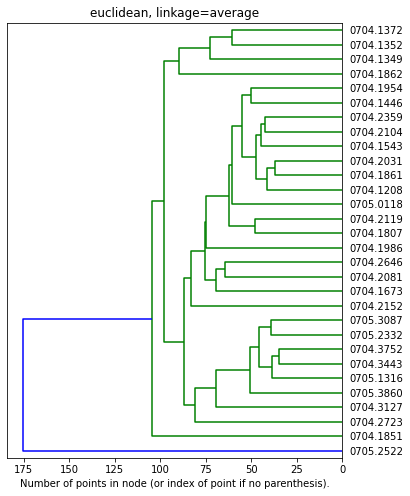

In [22]:
parm_affinity = 'euclidean'
param_linkage = 'average'
  # setting distance_threshold=0 ensures we compute the full tree.
  # affinity: 距離の出す際の計算方法 
  #linkage : 観測セット間で使用する距離 ward マージされるクラスターの分散を最小限に抑える 
  #distance_threshold クラスターはマージされないリンケージ距離のしきい値
  #n_clusters 検索するクラスターの数
model = AgglomerativeClustering(affinity= parm_affinity,
linkage= param_linkage, 
distance_threshold=0,
n_clusters=None)
model = model.fit(df)
fig = plt.figure( figsize=(6,8))
plt.title(parm_affinity + ', linkage=' + param_linkage )
  # plot the top three levels of the dendrogram
plot_dendrogram(model, truncate_mode='level')#, p=3)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
#plt.figure(figsize=(6, 8), dpi=300)
  #fig.savefig("dendrogram.pdf")
fig.savefig( output_folder_path + "/dendrogram_z_euclidean_mean_sub.pdf", bbox_inches='tight')
plt.show()

In [23]:
df

,manifolds,prove,algebras,mathematics,denote,riemannian,ﬁnite,satisﬁes,imply,preprint,compact,spaces,proposition,sense,vector,multiplication,primitive,uniformly,regularity,solution,assume,hence,phrases,necessarily,generated,manifold,remark,ricci,problem,every,consequently,converges,proved,belongs,rings,curvature,metric,anal,gives,smooth,estimates,mech,respect,must,bound,holds,inﬁnite,author,algebra,comm,corollary,solutions,commutative,satisfying,estimate,ideal,obtain,ﬁnitely,math,inequality,positive,metrics,exists,moreover,gradient,associative,enough,cauchy,ring,existence,supported,bounded,cluster_id
0,-0.641970,9.271655,57.872810,5.260651,0.376980,-0.445473,1.070390,7.335347,-0.557809,-0.524027,-0.982755,-0.889574,6.976971,0.496078,-0.700924,-0.462584,-0.349321,-0.537409,-0.351035,-1.516170,10.965051,4.655587,-0.206739,-0.526756,48.485206,-0.824744,-0.892083,-0.394420,-1.425202,37.133097,-0.589093,-0.452675,2.032496,-0.482759,-0.507278,-0.803605,-1.152309,-0.395602,-1.208842,-0.936770,-0.746590,-0.294534,-1.192471,-1.246706,-1.099072,2.299572,8.586437,-0.479919,34.833502,16.244653,1.439636,-1.256811,-0.562511,-0.700306,-1.020722,41.090097,1.859003,-0.522497,4.571365,-0.758204,-1.253886,-0.421473,3.919295,1.971077,-0.552040,-0.264600,-0.871160,-0.382750,-0.861419,-0.845709,0.495854,-0.911612,2
1,-0.892633,3.250228,10.641297,0.129739,2.925383,-0.619412,3.487656,4.701619,4.382162,-0.728638,-1.366482,-1.236917,4.127856,0.751031,2.120925,4.021282,32.456671,-0.747246,-0.488100,-1.633458,4.349888,17.536232,-0.287462,-0.732433,0.730687,-1.146773,14.081308,-0.548425,-1.981686,1.817224,-0.819111,-0.629426,2.958241,0.818602,-0.705350,-1.117380,-1.602240,-0.550068,-1.085611,-1.302541,-1.038104,-0.409537,-1.054685,-1.156320,-1.528216,2.578101,-1.179320,2.330042,38.554376,-0.502417,8.748486,-1.747545,-0.782150,0.053384,-1.419272,24.201549,0.816984,-0.726511,-0.814331,-1.054252,-1.743478,-0.586042,13.636190,5.739650,-0.767589,29.530958,1.265977,-0.532199,-0.362671,20.939707,-0.168626,-1.267561,2
2,-0.692767,0.592660,46.969257,-0.727439,3.903298,-0.480721,0.757747,-0.922533,-0.601946,-0.565491,-1.060517,-0.959963,4.864405,7.448639,1.107855,1.504218,-0.376961,-0.579933,-0.378811,-1.636139,0.531285,-0.325117,-0.223097,1.190943,-1.090499,-0.890003,2.154504,-0.425629,-1.537973,1.702327,0.937533,-0.488493,1.772886,-0.520958,1.279502,-0.867191,-1.243487,-0.426904,0.996394,-1.010894,-0.805665,-0.317839,1.823098,6.091567,1.344430,2.986667,-0.915262,3.344207,54.879485,2.174804,6.546106,-1.356257,4.335679,3.214673,-1.101488,0.450594,2.737537,-0.563841,-0.086321,5.293988,2.344087,-0.454823,12.111708,-1.087252,-0.595721,-0.285537,0.123908,-0.413036,3.374527,-0.912627,-0.844362,-0.983745,2
3,-0.933519,6.852398,46.414801,2.080700,3.198449,-0.647783,0.903109,1.170718,0.421832,-0.762013,-1.429072,1.026209,-1.408666,-0.258505,2.340220,5.274256,-0.507964,-0.781473,3.407769,-2.204736,7.982153,4.415064,3.025779,-0.765981,18.272342,-1.199300,1.016040,-0.573545,-2.072455,5.513690,0.310874,-0.658256,1.790044,-0.702004,12.819945,-1.168561,-1.675629,-0.575263,-1.188671,-1.362203,-1.085653,-0.428296,0.573851,7.569325,-1.598214,0.128894,-1.233338,-0.697874,53.093759,-0.525430,3.498114,-1.827589,11.408649,-1.018349,-1.484281,5.417916,-1.709813,4.505323,1.089501,-1.102541,-0.177122,-0.612885,1.792578,3.314388,-0.802748,2.214266,-1.266796,-0.556576,4.337019,-0.416440,2.378496,-1.325620,2
4,-0.614202,-0.036431,5.323126,4.007349,3.036513,-0.426204,-0.788472,1.627948,-0.533681,-0.501361,4.379245,-0.851097,10.565301,-0.748524,-1.349409,13.115418,-0.334211,-0.514165,-0.335851,-1.450590,-1.318553,0.016174,-0.197797,-0.503972,-0.966829,-0.789070,9.694205,-0.377360,-1.363557,-1.172869,-0.563613,-0.433095,-0.693963,-0.461878,28.363140,-0.768846,-1.102468,-0.378490,1.438644,-0.896252,-0.714297,-0.281794,-1.140892,-1.192781,-1.051534,0.235802,-0.811465,-0.459161,3.576380,-0.345703,-0.829698,-1.202449,1.320131,2.315488,-0.976572,-0.709150,5.578490,31.509645,-1.293071,-0.725409,-1.19